In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag 
from statsmodels.tsa.stattools import adfuller 
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr

import warnings

#plt.style.use('fivethirtyeight') import warnings warnings.warn('ignore')
%matplotlib inline


In [7]:
df = pd.read_csv(r'C:\Users\pijus\ineuron\data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [8]:
stock_features =['NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY']
col_list = ['DATE'] + stock_features
df1 = df[col_list]
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,1491226200,143.6800,102.2300,81.03,33.7400,33.3975
1,1491226260,143.7000,102.1400,81.21,33.8800,33.3950
2,1491226320,143.6901,102.2125,81.21,33.9000,33.4100
3,1491226380,143.6400,102.1400,81.13,33.8499,33.3350
4,1491226440,143.6600,102.0600,81.12,33.8400,33.4000


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         41266 non-null  int64  
 1   NASDAQ.AAPL  41266 non-null  float64
 2   NASDAQ.ADP   41266 non-null  float64
 3   NASDAQ.CBOE  41266 non-null  float64
 4   NASDAQ.CSCO  41266 non-null  float64
 5   NASDAQ.EBAY  41266 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.9 MB


In [10]:
df1.isnull().sum()

DATE           0
NASDAQ.AAPL    0
NASDAQ.ADP     0
NASDAQ.CBOE    0
NASDAQ.CSCO    0
NASDAQ.EBAY    0
dtype: int64

In [11]:
df1 =df1.copy()
df1['DATE'] = pd.to_datetime(df1['DATE'],unit='s')

In [12]:
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


In [13]:
df1.tail()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
41261,2017-08-31 19:56:00,164.11,106.565,100.89,32.185,36.135
41262,2017-08-31 19:57:00,164.12,106.590,100.88,32.200,36.130
41263,2017-08-31 19:58:00,164.01,106.520,100.86,32.200,36.130
41264,2017-08-31 19:59:00,163.88,106.400,100.83,32.195,36.120
41265,2017-08-31 20:00:00,163.98,106.470,100.89,32.225,36.130


In [14]:
df1 = df1.copy()
df1['Month'] = df1['DATE'].dt.date

In [15]:
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY,Month
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975,2017-04-03
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950,2017-04-03
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100,2017-04-03
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350,2017-04-03
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000,2017-04-03


In [16]:
col_list = ['Month']+ stock_features
df2 = df1[col_list]
df2.head()

,Month,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,2017-04-03,143.6800,102.2300,81.03,33.7400,33.3975
1,2017-04-03,143.7000,102.1400,81.21,33.8800,33.3950
2,2017-04-03,143.6901,102.2125,81.21,33.9000,33.4100
3,2017-04-03,143.6400,102.1400,81.13,33.8499,33.3350
4,2017-04-03,143.6600,102.0600,81.12,33.8400,33.4000


In [17]:
df2.isnull().sum()

Month          0
NASDAQ.AAPL    0
NASDAQ.ADP     0
NASDAQ.CBOE    0
NASDAQ.CSCO    0
NASDAQ.EBAY    0
dtype: int64

In [18]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NASDAQ.AAPL,41266.0,150.453566,6.236826,140.160,144.640,149.9450,155.065,164.51
NASDAQ.ADP,41266.0,103.480398,4.424244,95.870,101.300,102.4400,104.660,121.77
NASDAQ.CBOE,41266.0,89.325485,5.746178,80.000,84.140,89.3150,93.850,101.35
NASDAQ.CSCO,41266.0,32.139336,0.985571,30.365,31.455,31.7733,32.790,34.49
NASDAQ.EBAY,41266.0,34.794506,1.099296,31.890,34.065,34.7700,35.610,37.46


In [19]:
final = df2.copy()
final['Month']=pd.to_datetime(final['Month'])

In [20]:
df_AAPL = final[['Month',stock_features[0]]]
df_AAPL.head()

,Month,NASDAQ.AAPL
0,2017-04-03,143.6800
1,2017-04-03,143.7000
2,2017-04-03,143.6901
3,2017-04-03,143.6400
4,2017-04-03,143.6600


In [21]:
df_AAPL.set_index('Month',inplace=True)
df_AAPL.head()

,NASDAQ.AAPL
Month,
2017-04-03,143.6800
2017-04-03,143.7000
2017-04-03,143.6901
2017-04-03,143.6400
2017-04-03,143.6600


In [22]:
df_AAPL.index

DatetimeIndex(['2017-04-03', '2017-04-03', '2017-04-03', '2017-04-03',
               '2017-04-03', '2017-04-03', '2017-04-03', '2017-04-03',
               '2017-04-03', '2017-04-03',
               ...
               '2017-08-31', '2017-08-31', '2017-08-31', '2017-08-31',
               '2017-08-31', '2017-08-31', '2017-08-31', '2017-08-31',
               '2017-08-31', '2017-08-31'],
              dtype='datetime64[ns]', name='Month', length=41266, freq=None)

In [23]:
df_AAPL.describe()

,NASDAQ.AAPL
count,41266.000000
mean,150.453566
std,6.236826
min,140.160000
25%,144.640000
50%,149.945000
75%,155.065000
max,164.510000


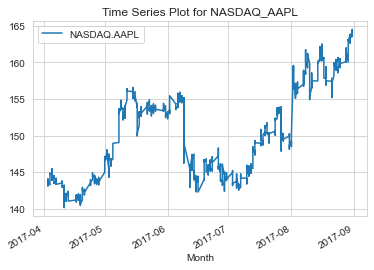

In [24]:
import seaborn as sns
sns.set_style('whitegrid')
df_AAPL.plot()
plt.title('Time Series Plot for NASDAQ_AAPL')
plt.show()

In [26]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
#Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    """
Pass in a time series, returns ADF report
"""
    result = adfuller(timeseries)
    print('\nAugmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'
]
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    for k,v in result[4].items():
        print('Crtical {} : value {}'.format(k,v))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis.Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

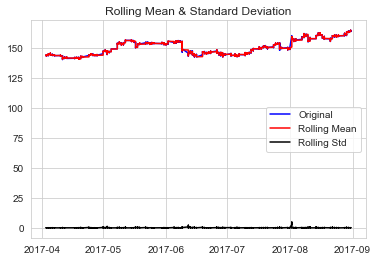


Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.912883451328314
p-value : 0.7837001095479612
#Lags Used : 31
Number of Observations Used : 41233
Crtical 1% : value -3.4305086037190557
Crtical 5% : value -2.8616100992580775
Crtical 10% : value -2.5668073115738617
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [37]:
test_stationarity(df_AAPL['NASDAQ.AAPL'])

In [38]:
df_AAPL = df_AAPL.copy()
df_AAPL.loc[:,'First_Difference'] = df_AAPL['NASDAQ.AAPL'] - df_AAPL['NASDAQ.AAPL'].shift(1)
df_AAPL.head()

,NASDAQ.AAPL,First_Difference
Month,,
2017-04-03,143.7000,NaN
2017-04-03,143.6901,-0.0099
2017-04-03,143.6400,-0.0501
2017-04-03,143.6600,0.0200
2017-04-03,143.7800,0.1200


In [39]:
df_AAPL = df_AAPL.copy()
df_AAPL.dropna(inplace=True)

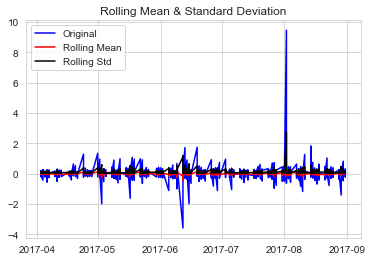


Augmented Dickey-Fuller Test:
ADF Test Statistic : -35.737220426950266
p-value : 0.0
#Lags Used : 30
Number of Observations Used : 41233
Crtical 1% : value -3.4305086037190557
Crtical 5% : value -2.8616100992580775
Crtical 10% : value -2.5668073115738617
strong evidence against the null hypothesis, reject the null hypothesis.Data has no unit root and is stationary


In [44]:
test_stationarity(df_AAPL['First_Difference'])

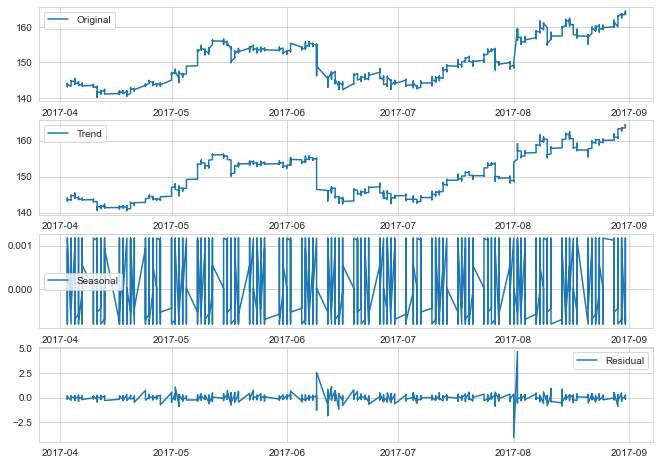

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(df_AAPL['NASDAQ.AAPL'],period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df_AAPL['NASDAQ.AAPL'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

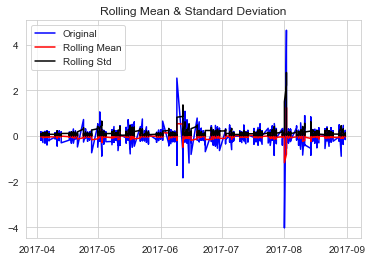


Augmented Dickey-Fuller Test:
ADF Test Statistic : -43.04310646025567
p-value : 0.0
#Lags Used : 55
Number of Observations Used : 41196
Crtical 1% : value -3.430508746177142
Crtical 5% : value -2.861610162219647
Crtical 10% : value -2.5668073450865676
strong evidence against the null hypothesis, reject the null hypothesis.Data has no unit root and is stationary


In [47]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

<Figure size 1440x576 with 0 Axes>

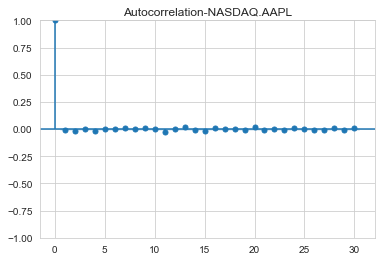

In [48]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.figure(figsize=(20,8))
fig_first = plot_acf(df_AAPL["First_Difference"],lags=30,title='Autocorrelation-NASDAQ.AAPL')

C:\Users\pijus\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1440x576 with 0 Axes>

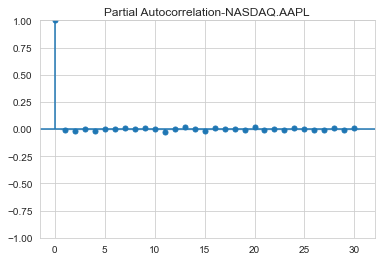

In [49]:
plt.figure(figsize=(20,8))
fig_pacf_first = plot_pacf(df_AAPL["First_Difference"],lags=30,title='Partial Autocorrelation-NASDAQ.AAPL')


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

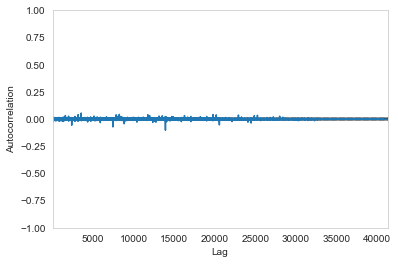

In [50]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_AAPL['First_Difference'])

C:\Users\pijus\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


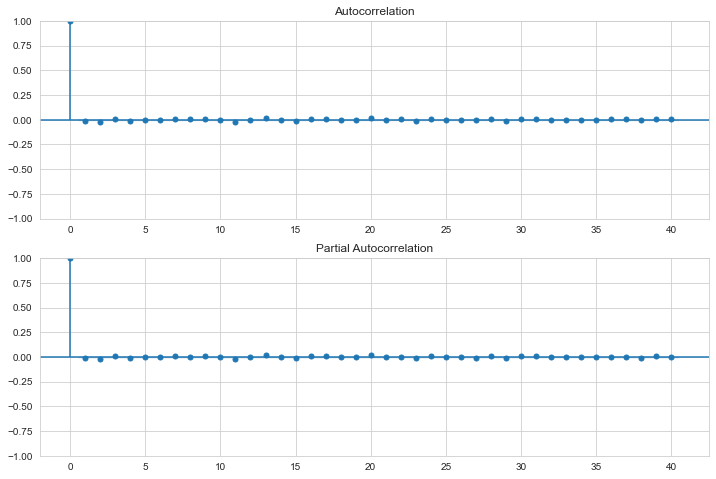

In [51]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_AAPL['First_Difference'].iloc[30:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_AAPL['First_Difference'].iloc[30:], lags=40, ax=ax2)

In [52]:
lag_acf = acf(df_AAPL['First_Difference'],nlags=80)
lag_pacf = pacf(df_AAPL['First_Difference'],nlags=80,method='ols')

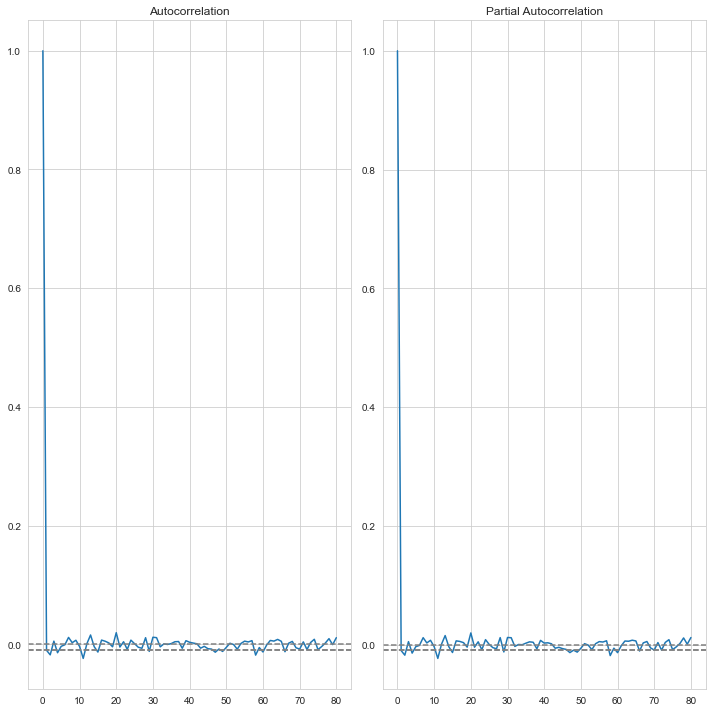

In [53]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_AAPL['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_AAPL['First_Difference'])),linestyle='--',color='gray')
plt.title('Autocorrelation')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_AAPL['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_AAPL['First_Difference'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation')
plt.tight_layout()

In [54]:
model= sm.tsa.statespace.SARIMAX(df_AAPL['NASDAQ.AAPL'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())

C:\Users\pijus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pijus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                        NASDAQ.AAPL   No. Observations:                41264
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               24924.485
Date:                            Wed, 14 Sep 2022   AIC                         -49846.969
Time:                                    22:05:28   BIC                         -49838.342
Sample:                                         0   HQIC                        -49844.243
                                          - 41264                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0175   4.57e-06   3828.614      0.000       0.017       0.017
Ljung-Box (L1) (Q):                

<AxesSubplot:xlabel='Month'>

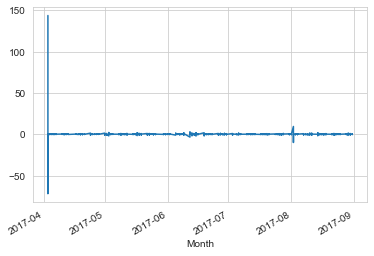

In [55]:
results.resid.plot()


<AxesSubplot:ylabel='Density'>

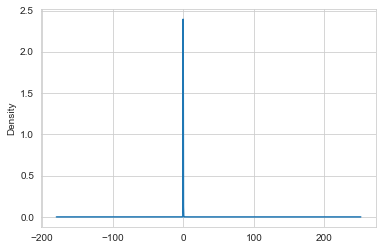

In [56]:
results.resid.plot(kind='kde')

In [57]:
df_AAPL = df_AAPL.copy()
df_AAPL['Forecast'] = results.predict()

In [58]:
df_AAPL.head()

,NASDAQ.AAPL,First_Difference,Forecast
Month,,,
2017-04-03,143.6901,-0.0099,0.0000
2017-04-03,143.6400,-0.0501,143.6901
2017-04-03,143.6600,0.0200,143.6400
2017-04-03,143.7800,0.1200,143.6600
2017-04-03,143.8640,0.0840,143.7800


<AxesSubplot:xlabel='Month'>

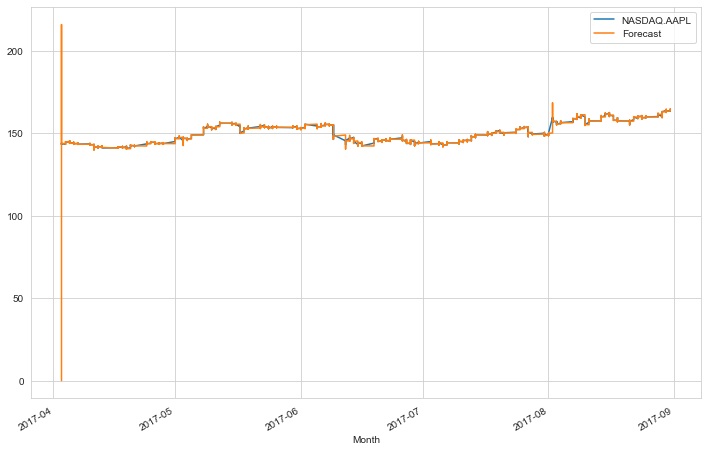

In [59]:
df_AAPL[['NASDAQ.AAPL','Forecast']].plot(figsize=(12,8))

In [60]:
results.forecast(steps=10)

C:\Users\pijus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


41264    163.960
41265    163.935
41266    163.910
41267    163.810
41268    163.940
41269    163.950
41270    163.890
41271    163.860
41272    163.870
41273    163.760
Name: predicted_mean, dtype: float64

In [61]:
results.predict(start=41264,end=41274)

C:\Users\pijus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


41264    163.960
41265    163.935
41266    163.910
41267    163.810
41268    163.940
41269    163.950
41270    163.890
41271    163.860
41272    163.870
41273    163.760
41274    163.630
Name: predicted_mean, dtype: float64

In [62]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.AAPL -', mean_squared_error(df_AAPL['NASDAQ.AAPL'],df_AAPL['Forecast']))
print('Mean Absolute Error NASDAQ.AAPL -', mean_absolute_error(df_AAPL['NASDAQ.AAPL'],df_AAPL['Forecast']))

Mean Squared Error NASDAQ.AAPL - 0.6428414795242895
Mean Absolute Error NASDAQ.AAPL - 0.07551204803148874


In [63]:
df_ADP = final[['Month',stock_features[1]]]
df_ADP.head()

,Month,NASDAQ.ADP
0,2017-04-03,102.2300
1,2017-04-03,102.1400
2,2017-04-03,102.2125
3,2017-04-03,102.1400
4,2017-04-03,102.0600


In [64]:
df_ADP.set_index('Month',inplace=True)
df_ADP.head()

,NASDAQ.ADP
Month,
2017-04-03,102.2300
2017-04-03,102.1400
2017-04-03,102.2125
2017-04-03,102.1400
2017-04-03,102.0600


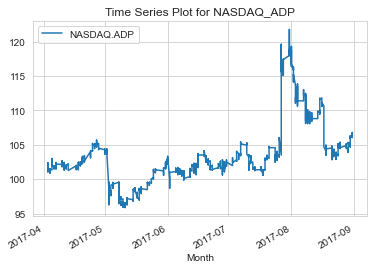

In [65]:
df_ADP.plot()
plt.title('Time Series Plot for NASDAQ_ADP')
plt.show()

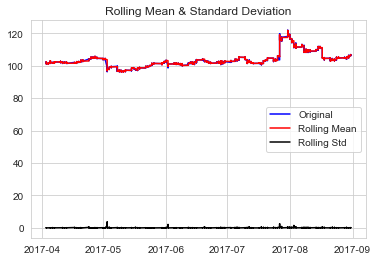


Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.7041735251575119
p-value : 0.42896344420666777
#Lags Used : 39
Number of Observations Used : 41226
Crtical 1% : value -3.4305086306509716
Crtical 5% : value -2.861610111161057
Crtical 10% : value -2.5668073179094897
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [66]:
test_stationarity(df_ADP['NASDAQ.ADP'])

In [67]:
df_ADP = df_ADP.copy()
df_ADP['First_Difference'] = df_ADP['NASDAQ.ADP'] - df_ADP['NASDAQ.ADP'].shift(1)
df_ADP.head()

,NASDAQ.ADP,First_Difference
Month,,
2017-04-03,102.2300,NaN
2017-04-03,102.1400,-0.0900
2017-04-03,102.2125,0.0725
2017-04-03,102.1400,-0.0725
2017-04-03,102.0600,-0.0800


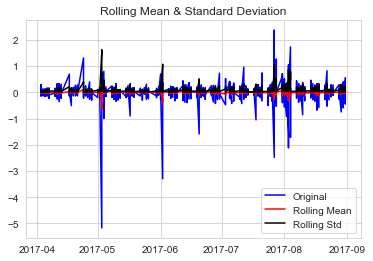


Augmented Dickey-Fuller Test:
ADF Test Statistic : -31.05566224463178
p-value : 0.0
#Lags Used : 38
Number of Observations Used : 41226
Crtical 1% : value -3.4305086306509716
Crtical 5% : value -2.861610111161057
Crtical 10% : value -2.5668073179094897
strong evidence against the null hypothesis, reject the null hypothesis.Data has no unit root and is stationary


In [68]:
df_ADP.dropna(inplace=True)
test_stationarity(df_ADP['First_Difference'])
#Now subtract the rolling mean from the original series

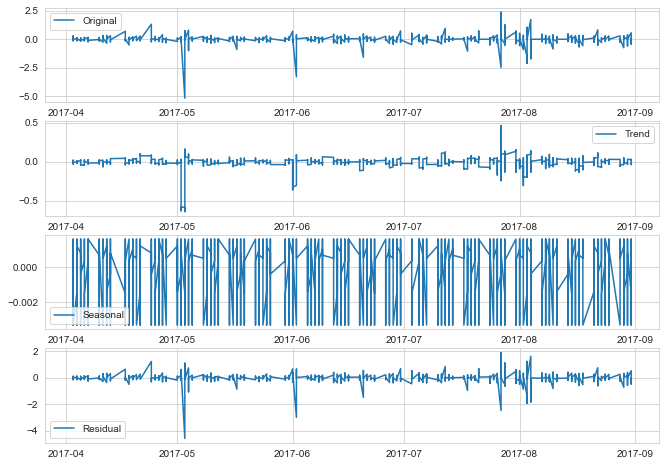

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(df_ADP['First_Difference'],period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df_ADP['First_Difference'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

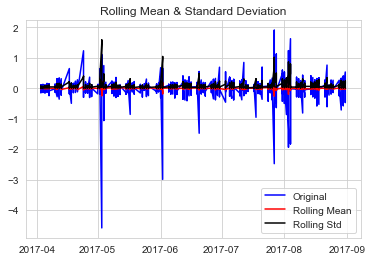


Augmented Dickey-Fuller Test:
ADF Test Statistic : -57.848665441138664
p-value : 0.0
#Lags Used : 55
Number of Observations Used : 41197
Crtical 1% : value -3.4305087423235587
Crtical 5% : value -2.861610160516496
Crtical 10% : value -2.566807344180027
strong evidence against the null hypothesis, reject the null hypothesis.Data has no unit root and is stationary


In [70]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

C:\Users\pijus\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


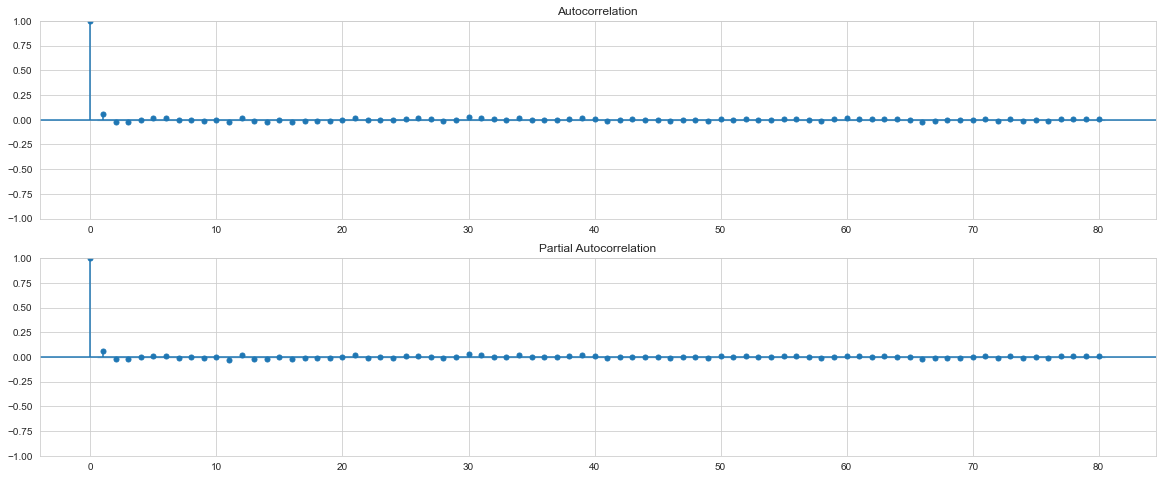

In [71]:
# Autocorrelation and Partial Corelation plot
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_ADP['First_Difference'].iloc[38:], lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_ADP['First_Difference'].iloc[38:], lags=80, ax=ax2)

In [72]:
lag_acf = acf(df_ADP['First_Difference'],nlags=80)
lag_pacf = pacf(df_ADP['First_Difference'],nlags=80,method='ols')

Text(0.5, 1.0, 'Partial Autocorrelation')

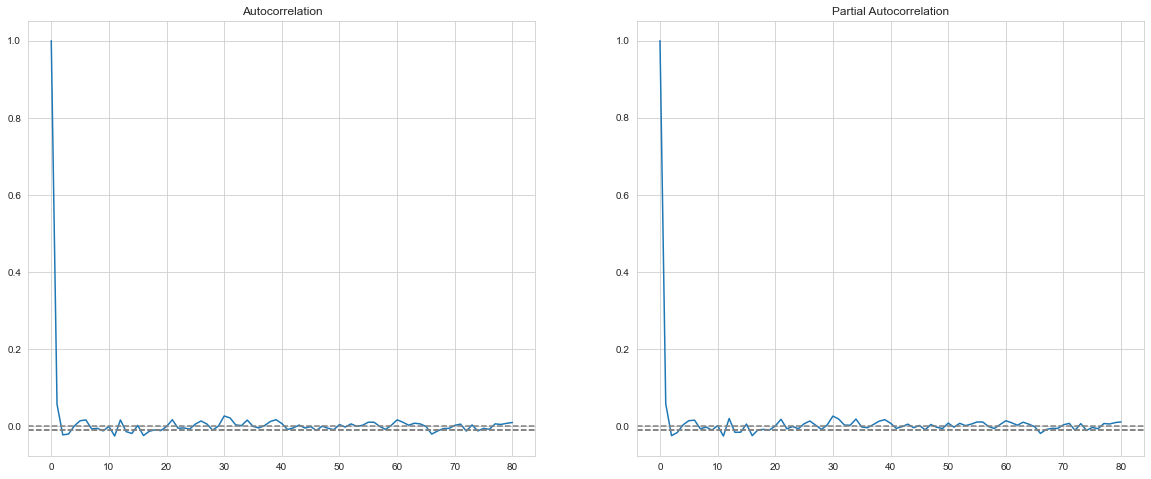

In [74]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_ADP['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_ADP['First_Difference'])),linestyle='--',color='gray')
plt.title('Autocorrelation')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_ADP['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_ADP['First_Difference'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation')

In [75]:
model= sm.tsa.statespace.SARIMAX(df_ADP['NASDAQ.ADP'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())

C:\Users\pijus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pijus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         NASDAQ.ADP   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               34733.013
Date:                            Wed, 14 Sep 2022   AIC                         -69464.026
Time:                                    22:09:06   BIC                         -69455.399
Sample:                                         0   HQIC                        -69461.299
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0109   5.34e-06   2036.759      0.000       0.011       0.011
Ljung-Box (L1) (Q):                

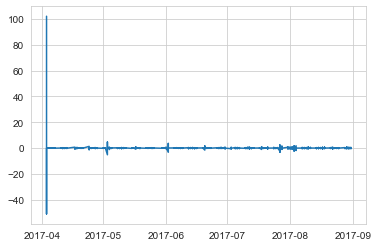

In [76]:
plt.plot(results.resid)

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(results.resid)

In [ ]:
df_ADP['Forecast'] = results.predict()

In [ ]:
df_ADP[['NASDAQ.ADP','Forecast']].tail()


In [ ]:
results.forecast(steps=10)

In [ ]:
results.predict(start=41264,end=41275)

In [ ]:
df_ADP[['NASDAQ.ADP','Forecast']].plot(figsize=(20,8))

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.AAPL -', mean_squared_error(df_ADP['NASDAQ.ADP'],df_ADP['Forecast']))
print('Mean Absolute Error NASDAQ.AAPL -', mean_absolute_error(df_ADP['NASDAQ.ADP'],df_ADP['Forecast']))

In [ ]:
df_CBOE= final[['Month',stock_features[2]]]
print(df_CBOE.head())
df_CBOE.set_index('Month',inplace=True)
print(df_CBOE.head())
df_CBOE.plot()
plt.title('Time Series Plot for NASDAQ_CBOE')
plt.show()
#test Stationarity
test_stationarity(df_CBOE['NASDAQ.CBOE'])

In [ ]:
df_CBOE = df_CBOE.copy()

In [ ]:
df_CBOE.head()

In [ ]:
df_CBOE['First_Difference'] = df_CBOE['NASDAQ.CBOE'] - df_CBOE['NASDAQ.CBOE'].shift(1)
df_CBOE.head()

In [ ]:
df_CBOE.dropna(inplace=True)

In [ ]:
test_stationarity(df_CBOE['First_Difference'])


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(df_CBOE['NASDAQ.CBOE'],period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df_CBOE['NASDAQ.CBOE'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

In [ ]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [ ]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_CBOE['First_Difference'].iloc[26:], lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_CBOE['First_Difference'].iloc[26:], lags=80, ax=ax2)

In [ ]:
lag_acf = acf(df_CBOE['First_Difference'],nlags=80)
lag_pacf = pacf(df_CBOE['First_Difference'],nlags=80,method='ols')

In [ ]:
plt.figure(figsize=(11,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CBOE['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CBOE['First_Difference'])),linestyle='--',color='gray')
plt.title('Autocorrelation')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CBOE['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CBOE['First_Difference'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation')
plt.tight_layout()

In [ ]:
model= sm.tsa.statespace.SARIMAX(df_CBOE['NASDAQ.CBOE'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())
print(results.forecast())
df_CBOE['Forecast'] = results.predict()
df_CBOE[['NASDAQ.CBOE','Forecast']].plot(figsize=(20,8))
plt.show()

In [ ]:
results.forecast(steps=10)

In [ ]:
results.predict(start=41264,end=41273)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.CBOE -', mean_squared_error(df_CBOE['NASDAQ.CBOE'],df_CBOE['Forecast']))
print('Mean Absolute Error NASDAQ.CBOE -', mean_absolute_error(df_CBOE['NASDAQ.CBOE'],df_CBOE['Forecast']))

In [ ]:
df_CSCO = final[['Month',stock_features[3]]]
print(df_CSCO.head())
df_CSCO.set_index('Month',inplace=True)
print(df_CSCO.head())
df_CSCO.plot()
plt.title("Time Series Plot for NASDAQ.CSCO")
plt.show()
#Test Staionarity
test_stationarity(df_CSCO['NASDAQ.CSCO'])

In [ ]:
df_CSCO = df_CSCO.copy()
df_CSCO['First_Difference'] = df_CSCO['NASDAQ.CSCO'] - df_CSCO['NASDAQ.CSCO'].shift(1)
df_CSCO.dropna(inplace=True)
test_stationarity(df_CSCO['First_Difference'])

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(df_CSCO['NASDAQ.CSCO'],period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df_CSCO['NASDAQ.CSCO'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

In [ ]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)




fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_CSCO['First_Difference'].iloc[46:], lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_CSCO['First_Difference'].iloc[46:], lags=80, ax=ax2)




lag_acf = acf(df_CSCO['First_Difference'],nlags=80)
lag_pacf = pacf(df_CSCO['First_Difference'],nlags=80,method='ols')





In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CSCO['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CSCO['First_Difference'])),linestyle='--',color='gray')
plt.title('Autocorrelation')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CSCO['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CSCO['First_Difference'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation')
plt.tight_layout()

In [ ]:
model= sm.tsa.statespace.SARIMAX(df_CSCO['NASDAQ.CSCO'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())
df_CSCO['Forecast'] = results.predict()
df_CSCO[['NASDAQ.CSCO','Forecast']].plot(figsize=(20,8))
plt.show()

In [ ]:
df_CSCO.head()

In [ ]:
results.forecast(steps=10)

In [ ]:
results.predict(start=41264,end=41275)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.CSCO -', mean_squared_error(df_CSCO['NASDAQ.CSCO'],df_CSCO['Forecast']))
print('Mean Absolute Error NASDAQ.CSCO -', mean_absolute_error(df_CSCO['NASDAQ.CSCO'],df_CSCO['Forecast']))

In [ ]:
df_EBAY = final[['Month',stock_features[4]]]
print(df_EBAY.head())
df_EBAY.set_index('Month',inplace=True)
print(df_EBAY.head())
df_EBAY.plot()
plt.title("Time Series Plot for NASDAQ.EBAY")
plt.show()
#Test Staionarity
test_stationarity(df_EBAY['NASDAQ.EBAY'])

In [ ]:
df_EBAY = df_EBAY.copy()
df_EBAY['First_Difference'] = df_EBAY['NASDAQ.EBAY'] - df_EBAY['NASDAQ.EBAY'].shift(1)
df_EBAY.dropna(inplace=True)
#test Stationarity
test_stationarity(df_EBAY['NASDAQ.EBAY'])

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(df_EBAY['NASDAQ.EBAY'],period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df_EBAY['NASDAQ.EBAY'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

In [ ]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [ ]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_EBAY['First_Difference'].iloc[47:], lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_EBAY['First_Difference'].iloc[47:], lags=80, ax=ax2)

In [ ]:
lag_acf = acf(df_EBAY['First_Difference'],nlags=80)
lag_pacf = pacf(df_EBAY['First_Difference'],nlags=80,method='ols')

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_EBAY['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_EBAY['First_Difference'])),linestyle='--',color='gray')
plt.title('Autocorrelation')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_EBAY['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_EBAY['First_Difference'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation')
plt.tight_layout()


In [ ]:
model= sm.tsa.statespace.SARIMAX(df_EBAY['NASDAQ.EBAY'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())
df_EBAY['Forecast'] = results.predict()
df_EBAY[['NASDAQ.EBAY','Forecast']].plot(figsize=(20,8))
plt.show()

In [ ]:
df_EBAY.head()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.EBAY -', mean_squared_error(df_EBAY['NASDAQ.EBAY'],df_
EBAY['Forecast']))
print('Mean Absolute Error NASDAQ.EBAY -', mean_absolute_error(df_EBAY['NASDAQ.EBAY'],d
f_EBAY['Forecast']))

In [ ]:
results.forecast(steps=10)

In [ ]:
results.predict(start=41265,end=41275)